# Libraries and Loading Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_files

def load_train():
    train_data = pd.read_csv(r'E:\FYP\P2\archive\train.csv', header = 0)
    X_train = train_data.drop(columns = 'fake')
    y_train = train_data['fake']
    return X_train, y_train

def load_test():
    test_data = pd.read_csv(r'E:\FYP\P2\archive\test.csv', header = 0)
    X_test = test_data.drop(columns = 'fake')
    y_test = test_data['fake']
    return X_test, y_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   profile pic:           576 non-null    int64  
 1   description length:    576 non-null    int64  
 2   external URL:          576 non-null    int64  
 3   private:               576 non-null    int64  
 4   #tweets:               576 non-null    int64  
 5   #followers:            576 non-null    int64  
 6   #following:            576 non-null    int64  
 7   nums/length username:  576 non-null    float64
 8   fullname words:        576 non-null    int64  
 9   nums/length fullname:  576 non-null    float64
 10  name==username:        576 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 49.6 KB
None
Size:  (576, 11) , Type:  <class 'pandas.core.frame.DataFrame'>
Size:  (576,) , Type:  <class 'pandas.core.series.Series'>
Label:  0 , Frequency:  288
Label:  1 , 

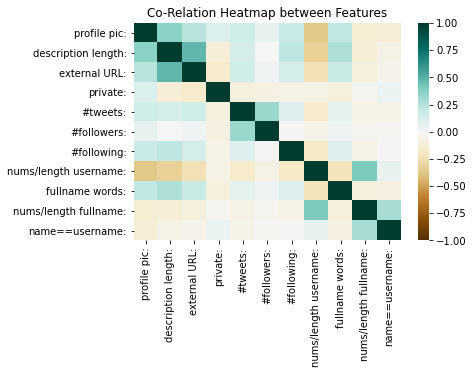

In [2]:
#Load Data
X_data, y_data = load_train()
print (X_data.info())
    
print ("Size: ", X_data.shape, ", Type: ", type(X_data))
print ("Size: ", y_data.shape, ", Type: ", type(y_data))
    
#Data Analysis
data_corr = X_data.corr(method = 'pearson')
ax = sns.heatmap (data_corr, vmin = -1, vmax = 1, cmap = 'BrBG')
ax.set_title ("Co-Relation Heatmap between Features")
    
#Imbalancing
unique , freq = np.unique(y_data, return_counts = True)
    
for i, j in zip (unique, freq):
    print ("Label: ", i, ", Frequency: ", j)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.33, random_state=42)

# Hyperparameter selection using grid search for decision tree classifier

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [5]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='auto', random_state=1024)

# Training decision tree classifier after hyperparameter tuning

<AxesSubplot:>

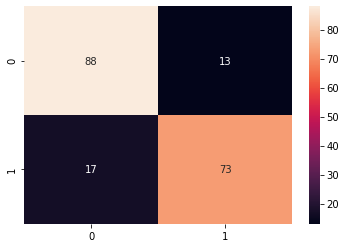

In [6]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
dt =DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       max_features='auto', random_state=1024)
dt.fit(X_train, y_train)
y_predict_dt = dt.predict(X_test)
# confusion_matrix
cm = confusion_matrix(y_test, y_predict_dt)
sns.heatmap(cm, annot=True, fmt="d")


# Performence of decision tree classifier

In [7]:
print('Accuracy',accuracy_score((y_test), y_predict_dt))
print('Precision',precision_score(y_test, y_predict_dt, average='macro'))
print('Recall',recall_score(y_test, y_predict_dt, average='macro'))

Accuracy 0.8429319371727748
Precision 0.8434662236987818
Recall 0.8411991199119913


# Hyperparameter selection using grid search for random forest classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Creating the model:
rf = RandomForestClassifier() 
params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gs = GridSearchCV(rf, param_grid= params, cv = 5,scoring = "roc_auc",verbose=1)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
0.9763697705802968
RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       n_estimators=200)
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}


# Training Random forest classifier after hyperparameter tuning

<AxesSubplot:>

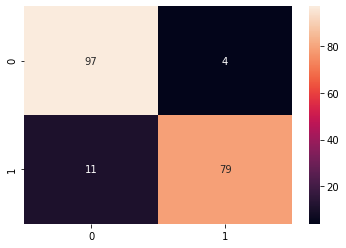

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       n_estimators=500,random_state=1000)
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)
# confusion_matrix
cm = confusion_matrix(y_test, y_predict_rf)
sns.heatmap(cm, annot=True, fmt="d")

# Performence of Random forest classifier

In [10]:
print('accuracy',accuracy_score((y_test), y_predict_rf))
print('precision',precision_score(y_test, y_predict_rf, average='macro'))
print('recall',recall_score(y_test, y_predict_rf, average='macro'))

accuracy 0.9214659685863874
precision 0.9249776885319054
recall 0.9190869086908691


# Hyperparameter selection using grid search for Bagging classifier

In [11]:
from sklearn.ensemble import BaggingClassifier
n_samples = X_data.shape[0]
n_features = X_data.shape[1]
bagging = BaggingClassifier() 
params = {
          'n_estimators': [20,50,100],
          'max_samples': [0.5, 1.0, n_samples//2, ],
          'max_features': [0.5, 1.0, n_features//2, ],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

gs = GridSearchCV(bagging, param_grid= params, cv = 5,scoring = "roc_auc",verbose=1)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
0.9753579895685158
BaggingClassifier(bootstrap_features=True, max_features=5, max_samples=288,
                  n_estimators=50)
{'bootstrap': True, 'bootstrap_features': True, 'max_features': 5, 'max_samples': 288, 'n_estimators': 50}


# Training Bagging classifier after hyperparameter tuning

<AxesSubplot:>

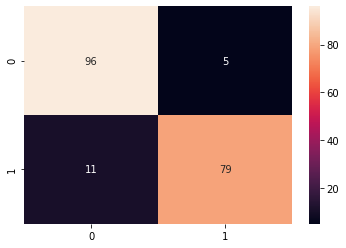

In [12]:
from sklearn.ensemble import BaggingClassifier
bagging =BaggingClassifier(bootstrap_features=True, max_features=5, max_samples=0.5,
                  n_estimators=100,random_state=1000)
bagging.fit(X_train, y_train)
y_predict_bagging = bagging.predict(X_test)
# confusion_matrix
cm = confusion_matrix(y_test, y_predict_bagging)
sns.heatmap(cm, annot=True, fmt="d")

# Performence of Bagging classifier

In [13]:
print('accuracy',accuracy_score((y_test), y_predict_bagging))
print('precision',precision_score(y_test, y_predict_bagging, average='macro'))
print('recall',recall_score(y_test, y_predict_bagging, average='macro'))

accuracy 0.9162303664921466
precision 0.9188362260792167
recall 0.9141364136413641


# Hyperparameter selection using grid search for KNN classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

params = {'n_neighbors':range(1,20),"metric":["euclidean", "manhattan"],
              'algorithm' :['ball_tree','kd_tree','brute']
        
             }
knn=KNeighborsClassifier()
gs = GridSearchCV(knn, param_grid= params, cv = 5,scoring = "roc_auc",verbose=1)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 114 candidates, totalling 570 fits
0.9477299668089142
KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=19)
{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 19}


# Training KNN classifier after hyperparameter tuning

<AxesSubplot:>

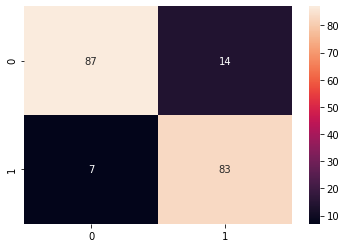

In [15]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
knn = KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=19)
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)
# confusion_matrix
cm = confusion_matrix(y_test, y_predict_knn)
sns.heatmap(cm, annot=True, fmt="d")

# Performence of KNN classifier

In [16]:
print('accuracy',accuracy_score((y_test), y_predict_knn))
print('precision',precision_score(y_test, y_predict_knn, average='macro'))
print('recall',recall_score(y_test, y_predict_knn, average='macro'))

accuracy 0.8900523560209425
precision 0.8906010089932002
recall 0.8918041804180419


# LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression

# Creating the model:
lr = LogisticRegression() 
params = {'C': np.logspace(-3,3,7), 'penalty': ['l1', 'l2']}

gs = GridSearchCV(lr, param_grid= params, cv = 5,scoring = "roc_auc",verbose=1)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
0.9748790896159317
LogisticRegression(C=100.0)
{'C': 100.0, 'penalty': 'l2'}


<AxesSubplot:>

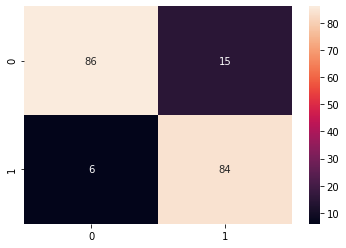

In [18]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(C=100.0,penalty='l2')
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)
# confusion_matrix
cm = confusion_matrix(y_test, y_predict_lr)
sns.heatmap(cm, annot=True, fmt="d")

# Performence of Logistic Regression

In [19]:
print('accuracy',accuracy_score((y_test), y_predict_lr))
print('precision',precision_score(y_test, y_predict_lr, average='macro'))
print('recall',recall_score(y_test, y_predict_lr, average='macro'))

accuracy 0.8900523560209425
precision 0.8916337285902504
recall 0.8924092409240925


# ROC curve for all the classifiers 

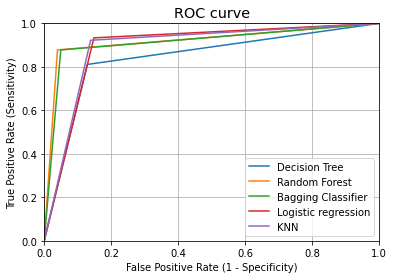

In [20]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, y_predict_dt)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_predict_rf)
fpr_bg, tpr_bg, thresholds_bg = metrics.roc_curve(y_test, y_predict_bagging)
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, y_predict_lr)
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test, y_predict_knn)

plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_bg, tpr_bg, label="Bagging Classifier")
plt.plot(fpr_lr, tpr_lr, label="Logistic regression")
plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

# Live input

In [21]:
def inp():
    l=[]

    for i in range(0,11):
        a=float(input(X_data.columns[i]))
        l.append(a)
    pred=rf.predict([l])
    return int(pred)


In [22]:
res=inp()
print('Output is:',res)

profile pic:1
description length:23
external URL:0
private:1
#tweets:200
#followers:32
#following:30
nums/length username:23
fullname words:56
nums/length fullname:59
name==username:44
Output is: 1


0    288
1    288
Name: fake, dtype: int64


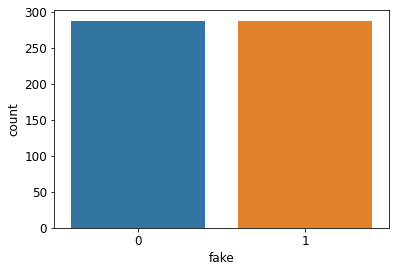

In [23]:
import pandas as pd
df=pd.read_csv(r'E:\FYP\P2\archive\train.csv')
print(df['fake'].value_counts())
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['fake'])
plt.show()